# Prepping the Data

- [X] create dummy variables  
- [X] rename/rearrange columns  
- [X] scale train df  
- [X] create clusters  
- [ ] create final prepare.py module  

## Describing the Raw Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
for x in df.describe().columns:
    print('Column Name:',x)
    print(df[x].value_counts())
    print('\n')

Column Name: UNDER_CONSTRUCTION
0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64


Column Name: RERA
0    20088
1     9363
Name: RERA, dtype: int64


Column Name: BHK_NO.
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64


Column Name: SQUARE_FT
1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
1749.908859      1
1684.001981      1
1864.207221      1
1383.862040      1
1532.889018      1
Name: SQUARE_FT, Length: 19561, dtype: int64


Column Name: READY_TO_MOVE
1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64


Column Name: RESALE
1    27377
0     2074
Name: RESALE, dtype: int64


Column Name: LONGITUDE
24.690280    1009
12.969910     671
30.662283     509
22.541110     479
19.058710     242
             ... 
10.610246       1
31.111584  

In [7]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


## Creating Dummies

In [8]:
df['is_owner'] = df.POSTED_BY.replace({'Owner':1,'Dealer':0,'Builder':0})

In [9]:
df = df.drop(columns='POSTED_BY', axis=1)

In [10]:
df.BHK_OR_RK.value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [11]:
df['is_BHK'] = df.BHK_OR_RK.replace({'BHK':1,'RK':0})

In [12]:
df = df.drop(columns='BHK_OR_RK', axis=1)

In [13]:
# renaming columns

df.columns = ['is_under_contruction','is_rera_approved','room_count','sqft','is_ready_to_move','is_resale',
              'address','long','lat','price_in_lacs','is_owner','is_bhk_property']

In [14]:
# reordering columns

df = df[['price_in_lacs','is_owner','is_ready_to_move','room_count','sqft','is_bhk_property','is_resale',
         'is_under_contruction','is_rera_approved','address','long','lat']]

In [15]:
df

,price_in_lacs,is_owner,is_ready_to_move,room_count,sqft,is_bhk_property,is_resale,is_under_contruction,is_rera_approved,address,long,lat
0,55.0,1,1,2,1300.236407,1,1,0,0,"Ksfc Layout,Bangalore",12.969910,77.597960
1,51.0,0,1,2,1275.000000,1,1,0,0,"Vishweshwara Nagar,Mysore",12.274538,76.644605
2,43.0,1,1,2,933.159722,1,1,0,0,"Jigani,Bangalore",12.778033,77.632191
3,62.5,1,1,2,929.921143,1,1,0,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500
4,60.5,0,0,2,999.009247,1,1,1,0,"New Town,Kolkata",22.592200,88.484911
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,45.0,1,1,3,2500.000000,1,1,0,0,"Shamshabad Road,Agra",27.140626,78.043277
29447,16.0,1,1,2,769.230769,1,1,0,0,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721
29448,27.1,0,1,2,1022.641509,1,1,0,0,"Ajmer Road,Jaipur",26.928785,75.828002
29449,67.0,1,1,2,927.079009,1,1,0,0,"Sholinganallur,Chennai",12.900150,80.227910


In [16]:
df.is_owner.value_counts()

0    18913
1    10538
Name: is_owner, dtype: int64

## Binning SQFT

In [17]:
df.sqft.value_counts()

1000.000000    479
1250.000000    294
800.000000     202
1200.000000    179
1600.000000    125
              ... 
1749.908859      1
1684.001981      1
1864.207221      1
1383.862040      1
1532.889018      1
Name: sqft, Length: 19561, dtype: int64

In [18]:
df['sqft_bins'] = pd.qcut(df['sqft'], 4, labels=[1,2,3,4])

In [19]:
pd.qcut(df['sqft'], 4).value_counts()

(1550.688, 254545454.5]    7363
(900.021, 1175.057]        7363
(2.999, 900.021]           7363
(1175.057, 1550.688]       7362
Name: sqft, dtype: int64

## Scaling the Train Data

In [20]:
import sklearn.preprocessing

In [21]:
train = df.copy()

train = train.drop(['price_in_lacs','address'], axis=1)

# 1. Create the Scaling Object
scaler = sklearn.preprocessing.StandardScaler()

# 2. Fit to the train data only
scaler.fit(train)

# 3. use the object on train
# this returns an array, so we convert to df in the same line
train_scaled = pd.DataFrame(scaler.transform(train))

# the result of changing an array to a df resets the index and columns
# change the index and columns back to original values
train_scaled.index = train.index
train_scaled.columns = train.columns

In [22]:
train_scaled

,is_owner,is_ready_to_move,room_count,sqft,is_bhk_property,is_resale,is_under_contruction,is_rera_approved,long,lat,sqft_bins
0,1.339680,0.468134,-0.446240,-0.009731,0.028558,0.27524,-0.468134,-0.682715,-1.342478,0.072011,0.447223
1,-0.746447,0.468134,-0.446240,-0.009744,0.028558,0.27524,-0.468134,-0.682715,-1.454541,-0.018289,0.447223
2,1.339680,0.468134,-0.446240,-0.009924,0.028558,0.27524,-0.468134,-0.682715,-1.373400,0.075254,-0.447192
3,1.339680,0.468134,-0.446240,-0.009926,0.028558,0.27524,-0.468134,1.464741,1.183208,0.048004,-0.447192
4,-0.746447,-2.136139,-0.446240,-0.009890,0.028558,0.27524,2.136139,-0.682715,0.208204,1.103210,-0.447192
...,...,...,...,...,...,...,...,...,...,...,...
29446,1.339680,0.468134,0.691318,-0.009100,0.028558,0.27524,-0.468134,-0.682715,0.941206,0.114191,1.341638
29447,1.339680,0.468134,-0.446240,-0.010010,0.028558,0.27524,-0.468134,-0.682715,3.004762,-15.438065,-1.341607
29448,-0.746447,0.468134,-0.446240,-0.009877,0.028558,0.27524,-0.468134,-0.682715,0.907066,-0.095637,-0.447192
29449,1.339680,0.468134,-0.446240,-0.009927,0.028558,0.27524,-0.468134,-0.682715,-1.353720,0.321117,-0.447192


## Splitting target and independent variables

In [23]:
X_train = train_scaled
y_train = df[['price_in_lacs']]

## Creating Clusters for Location

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
# Tax Cluster
# Selecting Features
X = X_train[['long', 'lat']]

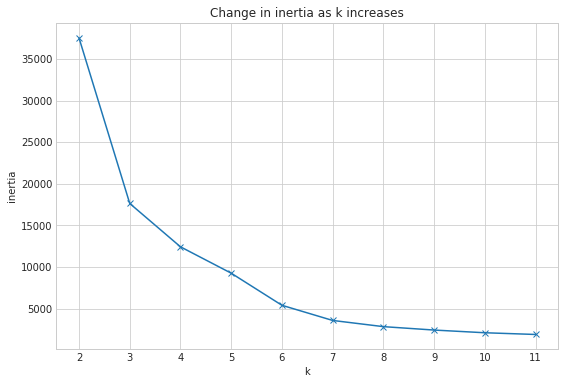

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [27]:
# Creating Object
kmeans = KMeans(n_clusters=5)

# Fitting to Train Only
kmeans.fit(X)

# Predicting to add column to train
train_scaled['cluster_sqft'] = kmeans.predict(X)

In [28]:
train_scaled

,is_owner,is_ready_to_move,room_count,sqft,is_bhk_property,is_resale,is_under_contruction,is_rera_approved,long,lat,sqft_bins,cluster_sqft
0,1.339680,0.468134,-0.446240,-0.009731,0.028558,0.27524,-0.468134,-0.682715,-1.342478,0.072011,0.447223,3
1,-0.746447,0.468134,-0.446240,-0.009744,0.028558,0.27524,-0.468134,-0.682715,-1.454541,-0.018289,0.447223,3
2,1.339680,0.468134,-0.446240,-0.009924,0.028558,0.27524,-0.468134,-0.682715,-1.373400,0.075254,-0.447192,3
3,1.339680,0.468134,-0.446240,-0.009926,0.028558,0.27524,-0.468134,1.464741,1.183208,0.048004,-0.447192,1
4,-0.746447,-2.136139,-0.446240,-0.009890,0.028558,0.27524,2.136139,-0.682715,0.208204,1.103210,-0.447192,4
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,1.339680,0.468134,0.691318,-0.009100,0.028558,0.27524,-0.468134,-0.682715,0.941206,0.114191,1.341638,1
29447,1.339680,0.468134,-0.446240,-0.010010,0.028558,0.27524,-0.468134,-0.682715,3.004762,-15.438065,-1.341607,2
29448,-0.746447,0.468134,-0.446240,-0.009877,0.028558,0.27524,-0.468134,-0.682715,0.907066,-0.095637,-0.447192,1
29449,1.339680,0.468134,-0.446240,-0.009927,0.028558,0.27524,-0.468134,-0.682715,-1.353720,0.321117,-0.447192,3


# Exploring the Data
- [ ] visualize X vs. y features
- [ ] hypothesis test key drivers of property price
- [ ] visualize cluster
- [ ] hypothesis test cluster

In [29]:
import seaborn as sns

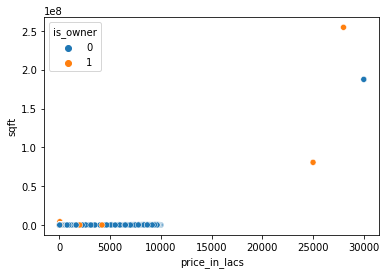

In [35]:
sns.scatterplot(x=df.price_in_lacs, y= df.sqft, hue=df.is_owner)

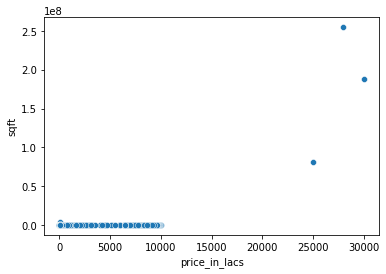

In [37]:
sns.scatterplot(x=df.price_in_lacs, y= df.sqft)

# Modeling

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# create linear regression object
lm = LinearRegression()

# fit to train only
lm.fit(X_train, df.price_in_lacs)

# predict on train
y_hat = lm.predict(X_train)

# calculating MSE
print('MSE:')
print(mean_squared_error(df.price_in_lacs, y_hat))

# calculate RMSE
print('\nRMSE:')
print(mean_squared_error(df.price_in_lacs, y_hat)**(1/2))

MSE:
327169.9888266409

RMSE:
571.9877523397165
